# Task3 基于机器学习分类

In [ ]:
#思路：文本向量化（one-hot或TF-IDF编码），机器学习分类器：线性回归、岭回归、朴素贝叶斯、svm、决策树、随机森林……

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
#根据task2中数据分析：
#新闻样本数据量分布不均衡，对数据较少的12，13等做复制补充到10000条左右，其它数据也都截取10000条
#读数据
df = pd.read_csv("data//train_set.csv",sep = '\t',nrows=20000)#index_col=0去掉索引
df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [29]:
df.shape

(22184, 3)

Text(0.5,1,'新闻类型分布')

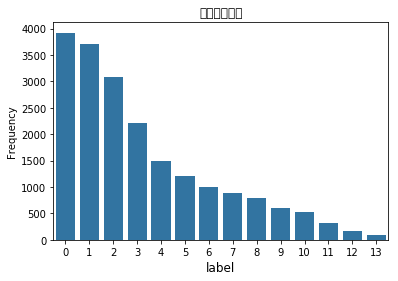

In [6]:
#看下各类新闻中文章数量分布情况
color = sns.color_palette()
sns.countplot(df['label'], color = color[0])#数各类别数据条数
plt.xlabel('label',fontsize = 12)
plt.ylabel('Frequency')
plt.title("新闻类型分布")

In [7]:
#数据复制
def copyNews(dataDf,tag):
    smallNewsDf = dataDf[dataDf['label']==tag]
    dataDf = pd.concat([dataDf,smallNewsDf,smallNewsDf])
    return dataDf
df = copyNews(df,13)
df = copyNews(df,12)
df = copyNews(df,11)
df = copyNews(df,10)

Text(0.5,1,'新闻类型分布')

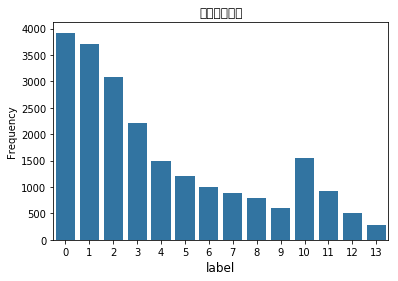

In [8]:
color = sns.color_palette()
sns.countplot(df['label'], color = color[0])#数各类别数据条数
plt.xlabel('label',fontsize = 12)
plt.ylabel('Frequency')
plt.title("新闻类型分布")

In [ ]:
#数据在类别内截取
# def cutNews(df,nrow):
#     newDf = {i:0 for i in range(14)}
#     for tag in range(14):
#         newDf[tag] = df[df['label']==tag][:nrow]
#     print(newDf)
#     dataDf = pd.concat(newDf)
#     dataDf.reset_index(drop=True)
#     return dataDf


In [ ]:
# dataDf = cutNews(df,10000)
# dataDf.shape

In [ ]:
# color = sns.color_palette()
# sns.countplot(dataDf['label'], color = color[0])#数各类别数据条数
# plt.xlabel('label',fontsize = 12)
# plt.ylabel('Frequency')
# plt.title("新闻类型分布")


In [ ]:
#dataDf['label']
#【问题截取有问题，label带着索引，待改】

In [9]:
#3750，648，900排名前三的很可能是标点符号移除字符
def delWord(text):
    text = text.replace('3750','')
    text = text.replace('648','')
    text = text.replace('900','')
    return text
df['text'] =df['text'].apply(delWord)

In [ ]:
#df['text'][0]#随意读出一条数据查找已无上面三个符号

In [14]:
#文本向量化处理
#CountVectorizer 词频向量化

vec = CountVectorizer()
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vec.fit_transform(corpus).toarray()



array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [17]:
#TFidf
# 词频逆文档频率-与上面单纯的数数相关，这里带了概率特征
tfidfVec = TfidfVectorizer()
tfidfVec.fit_transform(corpus).toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [ ]:
df.head()

In [32]:
#用tfidf处理数据向量化，做岭回归分类
tfidf = TfidfVectorizer(ngram_range = (1,3), max_features=3000)
dataVec = tfidf.fit_transform(df['text'])

In [33]:
dataVec[:2]

<2x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 725 stored elements in Compressed Sparse Row format>

In [34]:
# 划分数据集
train_x = dataVec[:15000]
train_y = df['label'][:15000]
test_x = dataVec[15000:]
test_y = df['label'][15000:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(15000, 3000)
(15000,)
(7184, 3000)
(7184,)


In [35]:
#训练
model = RidgeClassifier()#岭回归分类器
model.fit(train_x,train_y)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [36]:
#预测
y_pred = model.predict(test_x)
print(f1_score(test_y,y_pred,average='macro'))

0.8875441790618933


In [39]:
#svm支持向量机分类
# modelSvm = SVC(kernel='linear')
# modelSvm.fit(train_x,train_y)
# y_pred_svm = modelSvm.predict(test_x)
# print(f1_score(test_y,y_pred_svm,average='macro'))

#【缺点：计算时间长】

In [53]:
#随机森林-集成学习

clf = RandomForestClassifier(oob_score=True, random_state=10)   
clf.fit(train_x,train_y)  

G:\ph\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
G:\ph\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)

In [54]:
y_pred_rf = clf.predict(test_x)
print(f1_score(test_y,y_pred_rf,average='macro'))

0.8097866413619534


In [ ]:
#岭回归还是挺好的，速度快，精度高